# Análisis de Rutas Combinadas
Este notebook está dedicado a la extracción y análisis de rutas específicas que son de nuestro interés, mediante la comparación de diversas métricas asignadas a cada ruta. Utilizamos estas comparativas para identificar patrones, eficiencias o áreas de mejora en las rutas seleccionadas.

A lo largo de este análisis, generamos visualizaciones que nos permiten observar no solo las métricas de interés, sino también el contexto más amplio en el que se desarrollan nuestras rutas. Este enfoque nos facilita una comprensión más profunda de los datos, permitiéndonos tomar decisiones informadas sobre posibles ajustes o mejoras.



# Combinaciones de rutas

In [ ]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt


### Cargamos Secuencias de rutas

In [ ]:
#rutaspacifico = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Pacifico.xlsx')
#rutascentro = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Centro.xlsx')
#rutasgolfo = pd.read_excel('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Rutas Golfo.xlsx')

In [ ]:
#rutaspacifico.dropna(axis=1, how='all', inplace=True)
#rutascentro.dropna(axis=1, how='all', inplace=True)
#rutasgolfo.dropna(axis=1, how='all', inplace=True)

In [ ]:
# Reemplazamos los NaN por una cadena vacía y convertimos los números a texto con el formato 'PG####'
#rutaspacifico_str = rutaspacifico.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')
#rutascentro_str = rutascentro.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')
#rutasgolfo_str = rutasgolfo.fillna('').applymap(lambda x: f'PG{int(x)}' if x != '' else '')


In [ ]:
# Combina las columnas en una cadena separada por comas
#rutaspacifico_str['secuencias_pacifico'] = rutaspacifico_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)
#rutascentro_str['secuencias_centro'] = rutascentro_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)
#rutasgolfo_str['secuencias_golfo'] = rutasgolfo_str.apply(lambda x: ', '.join(filter(None, x)), axis=1)


In [ ]:
# Crear un nuevo DataFrame con una sola columna que contiene las secuencias
#df_secuencias_pacifico = pd.DataFrame({'secuencias_pacifico': rutaspacifico_str['secuencias_pacifico']})
#df_secuencias_centro = pd.DataFrame({'secuencias_centro': rutascentro_str['secuencias_centro']})
#df_secuencias_golfo = pd.DataFrame({'secuencias_golfo': rutasgolfo_str['secuencias_golfo']})


In [ ]:
# Verificar filas duplicadas en df_secuencias_pacifico
#duplicados_pacifico = df_secuencias_pacifico.duplicated()
#print("Filas duplicadas en Pacifico:", df_secuencias_pacifico[duplicados_pacifico])

# Verificar filas duplicadas en df_secuencias_centro
#duplicados_centro = df_secuencias_centro.duplicated()
#print("Filas duplicadas en Centro:", df_secuencias_centro[duplicados_centro])

# Verificar filas duplicadas en df_secuencias_golfo
#duplicados_golfo = df_secuencias_golfo.duplicated()
#print("Filas duplicadas en Golfo:", df_secuencias_golfo[duplicados_golfo])


In [ ]:
# Eliminar filas duplicadas en df_secuencias_pacifico
#df_secuencias_pacifico = df_secuencias_pacifico.drop_duplicates()

# Eliminar filas duplicadas en df_secuencias_centro
#df_secuencias_centro = df_secuencias_centro.drop_duplicates()

# Eliminar filas duplicadas en df_secuencias_golfo
#df_secuencias_golfo = df_secuencias_golfo.drop_duplicates()


In [ ]:
# Cambiar el nombre de la columna en df_secuencias_centro
#df_secuencias_centro = df_secuencias_centro.rename(columns={'secuencias_centro': 'secuencias'})

# Cambiar el nombre de la columna en df_secuencias_golfo
#df_secuencias_golfo = df_secuencias_golfo.rename(columns={'secuencias_golfo': 'secuencias'})

# Cambiar el nombre de la columna en df_secuencias_pacifico
#df_secuencias_pacifico = df_secuencias_pacifico.rename(columns={'secuencias_pacifico': 'secuencias'})

In [ ]:
df_secuencias_centro.tail

## secuencias incorrectas, arregladon 12 de mayo

In [ ]:
df_secuencias_centro = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Centro.csv')
df_secuencias_golfo = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Golfo.csv')
df_secuencias_pacifico = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Pacifico.csv')


In [ ]:
# Unir los DataFrames
df_unido = pd.concat([df_secuencias_centro, df_secuencias_golfo, df_secuencias_pacifico], ignore_index=True)


In [ ]:
df_unido

In [ ]:
# Definir los nombres y prefijos de los identificadores para cada área
#nombres_areas = ['pacifico', 'centro', 'golfo']
#prefijos_areas = ['RP', 'RC', 'RG']

# Iterar sobre cada DataFrame y su respectivo nombre de área
#for nombre_area, prefijo_area in zip(nombres_areas, prefijos_areas):
    # Obtener el DataFrame correspondiente
#    df = globals()[f"df_secuencias_{nombre_area}"]
    
    # Generar identificadores únicos para cada secuencia en el DataFrame
#    identificadores = [f"{prefijo_area}{i+1:03d}" for i in range(len(df))]
    
    # Agregar la columna 'ID_Ruta' con los identificadores al DataFrame
#    df['ID_Ruta'] = identificadores
    
    # Reordenar las columnas
#    df = df[['ID_Ruta', 'secuencias']]
    
    # Mostrar las primeras filas del DataFrame para verificar
#    print(f"DataFrame df_secuencias_{nombre_area} con identificadores:")
#    print(df.head())
    print()


### Guardamos df con secuencias

In [ ]:
#df_secuencias_pacifico.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Pacifico.csv')
#df_secuencias_centro.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv')
#df_secuencias_golfo.to_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Golfo.csv')

In [ ]:
df_secuencias_pacifico = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Pacifico.csv')
df_secuencias_centro = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv')
df_secuencias_golfo = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Golfo.csv')

In [ ]:
df_secuencias_centro

In [ ]:
# Asumiendo que df_secuencias_centro es tu DataFrame

# Aplicamos una función que verifica el final de cada secuencia y, si termina en '694',
# le añade ',PG655, PG617, PG578'
df_secuencias_centro['secuencias'] = df_secuencias_centro['secuencias'].apply(
    lambda x: x + ', PG655, PG617, PG578' if x.endswith('694') else x
)

# Mostramos las primeras filas para verificar los cambios
print(df_secuencias_centro.head())


In [ ]:
# Filtramos para encontrar la fila con la ID_Ruta 'RC451'
secuencia_rc451 = df_secuencias_centro[df_secuencias_centro['ID_Ruta'] == 'RC451']['secuencias']

# Imprimimos la secuencia de la ruta 'RC451'
print('Secuencia de la ruta RC451:', secuencia_rc451.iloc[0])


In [ ]:
# Inicializamos una lista para guardar las nuevas filas
nuevas_filas = []

# Iteramos sobre cada fila del DataFrame
for index, row in df_secuencias_centro.iterrows():
    # Verificamos si la secuencia termina en '694'
    if row['secuencias'].endswith('PG5774'):
        # Modificamos la secuencia actual
        row['secuencias'] += ', PG774'
        # Añadimos la fila modificada a la lista de nuevas filas
        nuevas_filas.append(row)
        

        # Añadimos la nueva fila a la lista de nuevas filas
        nuevas_filas.append(nueva_fila)
    else:
        # Si no termina en '694', añadimos la fila sin cambios
        nuevas_filas.append(row)

# Creamos un nuevo DataFrame a partir de las nuevas filas
df_secuencias_modificado = pd.DataFrame(nuevas_filas).reset_index(drop=True)

# Mostramos las primeras filas para verificar los cambios
print(df_secuencias_modificado.head())


In [ ]:
# Inicializamos una lista para guardar las nuevas filas
nuevas_filas = []

# Iteramos sobre cada fila del DataFrame
for index, row in df_secuencias_centro.iterrows():
    # Creamos una copia de la fila actual para trabajar y posiblemente añadir al DataFrame
    fila_actual = row.copy()
    
    # Verificamos si la secuencia termina en 'PG5774'
    if fila_actual['secuencias'].endswith('PG5774'):
        # Modificamos la secuencia actual reemplazando 'PG5774' con 'PG774'
        fila_actual['secuencias'] = fila_actual['secuencias'][:-7] + 'PG774'
    
    # Añadimos la fila modificada a la lista de nuevas filas
    nuevas_filas.append(fila_actual)

    # Si la secuencia fue modificada, añadimos una nueva fila con otra secuencia corregida
    if fila_actual['secuencias'] != row['secuencias']:
        nueva_fila = fila_actual.copy()
        nueva_fila['secuencias'] += ',PG655, PG695, PG734, PG5774'
        nuevas_filas.append(nueva_fila)
    else:
        # Si la secuencia no terminó en 'PG5774', añadimos la fila sin cambios
        nuevas_filas.append(row)

# Creamos un nuevo DataFrame a partir de las nuevas filas
df_secuencias_modificado = pd.DataFrame(nuevas_filas).reset_index(drop=True)

# Mostramos las primeras filas para verificar los cambios
print(df_secuencias_modificado.head())


In [ ]:
# Inicializamos una lista para guardar las nuevas filas
nuevas_filas = []

# Iteramos sobre cada fila del DataFrame
for index, row in df_secuencias_centro.iterrows():
    # Verificamos si la secuencia termina en 'PG5774'
    if row['secuencias'].endswith('PG5774'):
        # Modificamos la secuencia actual quitando el 'PG5774' incorrecto y añadiendo 'PG774'
        secuencia_corregida = row['secuencias'][:-7] + 'PG774'
        # Creamos la nueva fila con la secuencia corregida
        nueva_fila_corregida = row.copy()
        nueva_fila_corregida['secuencias'] = secuencia_corregida
        # Añadimos la fila corregida a la lista de nuevas filas
        nuevas_filas.append(nueva_fila_corregida)
        # Creamos otra fila nueva con la secuencia extendida
        secuencia_extendida = secuencia_corregida + ',PG655, PG695, PG734, PG5774'
        nueva_fila_extendida = row.copy()
        nueva_fila_extendida['secuencias'] = secuencia_extendida
        # Añadimos la fila extendida a la lista de nuevas filas
        nuevas_filas.append(nueva_fila_extendida)
    else:
        # Si la secuencia no termina en 'PG5774', la añadimos sin cambios
        nuevas_filas.append(row)

# Creamos un nuevo DataFrame a partir de las nuevas filas
df_secuencias_modificado = pd.DataFrame(nuevas_filas).reset_index(drop=True)

# Mostramos las primeras filas para verificar los cambios
print(df_secuencias_modificado.head())


In [ ]:
# Buscamos 'PG5774' en las secuencias
contiene_PG5774 = df_secuencias_modificado['secuencias'].str.contains('PG5774')

# Verificamos si hay alguna secuencia que todavía contenga 'PG5774'
hay_PG5774 = contiene_PG5774.any()

# Imprimimos el resultado
print("¿Hay secuencias que todavía contienen 'PG5774'?:", hay_PG5774)


In [ ]:
# Encuentra todas las secuencias que contienen 'PG5774'
#secuencias_con_PG5774 = df_secuencias_modificado[df_secuencias_modificado['secuencias'].str.contains('PG5774')]

# Muestra las secuencias que contienen 'PG5774'
##secuencias_con_PG5774


In [ ]:
# Filtra el DataFrame para eliminar filas donde 'secuencias' contiene 'PG5774'
#df_secuencias_sin_PG5774 = df_secuencias_modificado[~df_secuencias_modificado['secuencias'].str.contains(',PG655, PG617, PG578')]

# Mostramos las primeras filas para verificar que las filas han sido eliminadas
#print(df_secuencias_sin_PG5774.head())


In [ ]:
# Corrige las secuencias que terminan con ',PG774' agregando un espacio después de la coma
#df_secuencias_sin_PG5774['secuencias'] = df_secuencias_sin_PG5774['secuencias'].apply(
#    lambda x: x[:-5] + ', PG655, PG617, PG578' if x.endswith(',PG655, PG617, PG578') else x)

# Mostramos las primeras filas para verificar los cambios
#print(df_secuencias_sin_PG5774.head())


In [ ]:
# Reset the index to help in generating the new ID_Ruta values
#df_secuencias_sin_PG5774.reset_index(drop=True, inplace=True)

# Generate new ID_Ruta values in the format 'RC' followed by a padded number
#df_secuencias_sin_PG5774['ID_Ruta'] = ['RC' + str(i + 1).zfill(3) for i in df_secuencias_sin_PG5774.index]

# Mostramos las primeras filas para verificar los cambios
#print(df_secuencias_sin_PG5774.head())


In [ ]:
#ruta_archivo = '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv'
#df_secuencias_sin_PG5774.to_csv(ruta_archivo, index=False)
#print(f"El DataFrame ha sido guardado exitosamente en: {ruta_archivo}")


### Notas:

Al procesar las rutas, nos dimos cuenta que habia muchas secuencias duplicadas. Tambien sera importante a la hora de reproducir la ultima version del ejercicio, eliminar filas intermedias antes de procesar los datos

## Valores / ruta 

In [ ]:
values_df = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')

In [ ]:
dfvalores.head()

In [ ]:
dfvalores.shape

In [ ]:
# Sort the DataFrame by 'eventos' in descending order
df_sorted = dfvalores.sort_values(by='inm_30km', ascending=False)

# If you want to reset the index after sorting and drop the old index
df_sorted = df_sorted.reset_index(drop=True)

print(df_sorted)

#### Ciudad Top (Detenciones)

Filtramos el df de manera que nos quede la ciudad con mas detenciones de cada grid

#### Aqui tenemos que tomar la decision de como sacar el punto de referencia para asignar el valor de cada ruta:

    a) Agrupamos por 'ID_Poligono' y encontramos la ciudad con el máximo número de 'detenciones' para cada grupo
    b) Agrupamos por 'ID_Poligono' y sacamos el promedio de 'detenciones' de todas las ciudades para cada grupo
    
  R: Aplicaremos metodo de promedio

In [ ]:
# Agrupamos por 'ID_Poligono' y encontramos la ciudad con el máximo número de 'detenciones' para cada grupo
ciudades_top_valores = dfvalores.loc[dfvalores.groupby('ID_Poligono')['eventos'].idxmax()]

# Calcular el promedio de detenciones para cada 'ID_Poligono' y redondearlo sin decimales
promedio_detenciones = dfvalores.groupby('ID_Poligono')['eventos'].mean().round(0)

# Resetear el índice si es necesario
ciudades_top_valores.reset_index(drop=True, inplace=True)

# Agregar la columna 'promedio_detenciones' al DataFrame resultante
ciudades_top_valores['promedio_eventos'] = ciudades_top_valores['ID_Poligono'].map(promedio_detenciones)

# Mostramos las primeras filas del nuevo DataFrame para verificar
print(ciudades_top_valores.head())




In [ ]:
ciudades_top_valores.head(60)

## Rutas (Ordenado y Filtrado top 3 por region):

### Rutas Top 3 (Detenciones)

#### df_secuencias_pacifico

#### R:

Ruta con mas detenciones total: RP105

Ruta con menos detenciones total: RP639

In [ ]:
df_secuencias_pacifico = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Pacifico.csv')


In [ ]:
# Inicializa la lista para almacenar las sumas de detenciones por ruta en el Pacífico
pacifico_sumas = []

# Itera sobre las secuencias del DataFrame df_secuencias_pacifico
for index, row in df_secuencias_pacifico.iterrows():
    # Extrae la secuencia actual y la divide en los IDs individuales
    ids_poligono = row['secuencias'].split(', ')
    # Inicializa las sumas para esta secuencia
    sumas = {
        'detenciones_total': 0,
        'detenciones_in_grid_total': 0,
    }
    
    # Busca cada ID en ciudades_top_valores y suma los valores de las columnas correspondientes
    for id_poligono in ids_poligono:
        data = ciudades_top_valores[ciudades_top_valores['ID_Poligono'] == id_poligono]
        for columna in sumas.keys():
            # Remueve '_total' para coincidir con los nombres de las columnas originales
            col_name = columna.replace('_total', '')
            # Suma si la columna existe en data
            if col_name in data.columns:
                sumas[columna] += data[col_name].sum()

    # Añade la secuencia y las sumas a la lista
    pacifico_sumas.append({'ID_Ruta': row['ID_Ruta'], 'secuencia': row['secuencias'], **sumas})

# Crea el DataFrame final a partir de la lista de resultados
df_pacifico_sumas = pd.DataFrame(pacifico_sumas)

# Reordena las columnas para incluir 'ID_Ruta' antes de 'secuencias'
df_pacifico_sumas = df_pacifico_sumas[['ID_Ruta', 'secuencia', 'detenciones_total', 'detenciones_in_grid_total']]


In [ ]:
df_pacifico_sumas = df_pacifico_sumas.sort_values('detenciones_total', ascending=False)

In [ ]:
# Step 1: Count the number of codes in each row
df_secuencias_pacifico['code_count'] = df_secuencias_pacifico['secuencias'].apply(lambda x: len(x.split(',')))

# Step 2: Sort the DataFrame based on the count
df_sorted = df_secuencias_pacifico.sort_values(by='code_count', ascending=False)

# Step 3: Retrieve the row(s) with the most codes
top_rows = df_sorted.head(1)  # Adjust the number inside head() for more rows

print(top_rows)

In [ ]:
df_pacifico_sumas.head(6)

##### Metodo Grupo: 
Tiene la finalidad de extraer grupos de rutas muy similares, para permitirnos identificar una escalacion de los datos mejor distribuida

 Si ocupamos las 3 mas, tenemos que considerar que hay que buscar la manera de filtrar las diferentes versiones de la misma secuencia mayoritaria

In [ ]:
# Aquí debemos definir qué consideramos como 'primeras etapas'. Como ejemplo, usaremos las primeras 3 'PGxxx'
#df_pacifico_sumas['grupo'] = df_pacifico_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[:4])

# Extraemos los últimos 3 'PGxxx' de la columna 'secuencia' para crear una nueva columna de grupo
#df_pacifico_sumas['grupo'] = df_pacifico_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[-4:]))


# Agrupar por 'grupo' y obtener el índice de la fila con el mayor 'detenciones_total' para cada grupo
#idx = df_pacifico_sumas.groupby('grupo')['detenciones_total'].idxmax()

# Filtrar el DataFrame original para mantener solo las filas con más 'detenciones_total' por grupo
#df_pacifico_sumas_filtrado = df_pacifico_sumas.loc[idx].reset_index(drop=True)

# Eliminar la columna 'grupo' que se agregó para el filtrado
#df_pacifico_sumas_filtrado.drop(columns=['grupo'], inplace=True)


In [ ]:
#df_pacifico_sumas_filtrado = df_pacifico_sumas_filtrado.sort_values(by='detenciones_total', ascending=False)

# Mostrar el DataFrame ordenado
#df_pacifico_sumas_filtrado.head(40)


#### df_secuencias_centro

##### R:

Ruta con mas detenciones total: RC155

Ruta con menos detenciones total: RC862

In [ ]:
df_secuencias_centro = pd.read_csv('/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/Secuencias_Centro.csv')



In [ ]:
df_secuencias_centro

In [ ]:
# Step 1: Count the number of codes in each row
df_secuencias_centro['code_count'] = df_secuencias_centro['secuencias'].apply(lambda x: len(x.split(',')))

# Step 2: Sort the DataFrame based on the count
df_sorted = df_secuencias_centro.sort_values(by='code_count', ascending=False)

# Step 3: Retrieve the row(s) with the most codes
top_rows = df_sorted.head(1)  # Adjust the number inside head() for more rows

print(top_rows)

In [ ]:
# Inicializa la lista para almacenar las sumas de detenciones por ruta en el Pacífico
#centro_sumas = []

# Itera sobre las secuencias del DataFrame df_secuencias_pacifico
#for index, row in df_secuencias_centro.iterrows():
    # Extrae la secuencia actual y la divide en los IDs individuales
#    ids_poligono = row['secuencias'].split(', ')
    # Inicializa las sumas para esta secuencia
#    sumas = {
#        'detenciones_total': 0,
#        'detenciones_in_grid_total': 0,
#    }
    
    # Busca cada ID en ciudades_top_valores y suma los valores de las columnas correspondientes
#    for id_poligono in ids_poligono:
#        data = ciudades_top_valores[ciudades_top_valores['ID_Poligono'] == id_poligono]
#        for columna in sumas.keys():
            # Remueve '_total' para coincidir con los nombres de las columnas originales
#            col_name = columna.replace('_total', '')
            # Suma si la columna existe en data
#            if col_name in data.columns:
#                sumas[columna] += data[col_name].sum()

    # Añade la secuencia y las sumas a la lista
#    centro_sumas.append({'ID_Ruta': row['ID_Ruta'], 'secuencia': row['secuencias'], **sumas})

# Crea el DataFrame final a partir de la lista de resultados
#df_centro_sumas = pd.DataFrame(centro_sumas)

# Reordena las columnas para incluir 'ID_Ruta' antes de 'secuencias'
#df_centro_sumas = df_centro_sumas[['ID_Ruta', 'secuencia', 'detenciones_total', 'detenciones_in_grid_total']]


In [ ]:
df_centro_sumas = df_centro_sumas.sort_values('detenciones_total', ascending=False)

In [ ]:
df_centro_sumas.head()

In [ ]:
# Lista de ID_Ruta especificados
id_rutas_especificados = ['RC862']

# Filtrar el DataFrame por los ID_Ruta especificados y luego imprimir la columna 'secuencia'
for id_ruta in id_rutas_especificados:
    secuencia = df_centro_sumas[df_centro_sumas['ID_Ruta'] == id_ruta]['secuencia'].values[0]
    print(f"ID_Ruta: {id_ruta}, Secuencia: {secuencia}")


In [ ]:
# Extraemos los últimos 3 'PGxxx' de la columna 'secuencia' para crear una nueva columna de grupo
#df_centro_sumas['grupo'] = df_centro_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[-3:]))

# Agrupar por 'grupo' y obtener el índice de la fila con el mayor 'detenciones_total' para cada grupo
#idx = df_centro_sumas.groupby('grupo')['detenciones_total'].idxmax()

# Filtrar el DataFrame original para mantener solo las filas con más 'detenciones_total' por grupo
#df_filtrado1 = df_centro_sumas.loc[idx].reset_index(drop=True)

# Si necesitas eliminar la columna 'grupo' que se agregó para el filtrado
#df_filtrado1.drop(columns=['grupo'], inplace=True)


In [ ]:
#df_filtrado1_sorted = df_filtrado1.sort_values(by='detenciones_total', ascending=False)

# Mostrar el DataFrame ordenado
#df_filtrado1_sorted.head(40)

In [ ]:
#df_filtrado1_sorted = df_filtrado1.sort_values(by='detenciones_total', ascending=True)

# Mostrar el DataFrame ordenado
#df_filtrado1_sorted.head(40)

#### df_secuencias_golfo
##### R:

Ruta con mas detenciones total: RG842

Ruta con menos detenciones total: RG160


In [ ]:
# Inicializa la lista para almacenar las sumas de detenciones por ruta en el Pacífico
golfo_sumas = []

# Itera sobre las secuencias del DataFrame df_secuencias_pacifico
for index, row in df_secuencias_golfo.iterrows():
    # Extrae la secuencia actual y la divide en los IDs individuales
    ids_poligono = row['secuencias'].split(', ')
    # Inicializa las sumas para esta secuencia
    sumas = {
        'detenciones_total': 0,
        'detenciones_in_grid_total': 0,
    }
    
    # Busca cada ID en ciudades_top_valores y suma los valores de las columnas correspondientes
    for id_poligono in ids_poligono:
        data = ciudades_top_valores[ciudades_top_valores['ID_Poligono'] == id_poligono]
        for columna in sumas.keys():
            # Remueve '_total' para coincidir con los nombres de las columnas originales
            col_name = columna.replace('_total', '')
            # Suma si la columna existe en data
            if col_name in data.columns:
                sumas[columna] += data[col_name].sum()

    # Añade la secuencia y las sumas a la lista
    golfo_sumas.append({'ID_Ruta': row['ID_Ruta'], 'secuencia': row['secuencias'], **sumas})

# Crea el DataFrame final a partir de la lista de resultados
df_golfo_sumas = pd.DataFrame(golfo_sumas)

# Reordena las columnas para incluir 'ID_Ruta' antes de 'secuencias'
df_golfo_sumas = df_golfo_sumas[['ID_Ruta', 'secuencia', 'detenciones_total', 'detenciones_in_grid_total']]


In [ ]:
df_golfo_sumas = df_golfo_sumas.sort_values('detenciones_total', ascending=False)

In [ ]:
df_golfo_sumas.head()

In [ ]:
# Step 1: Count the number of codes in each row
df_secuencias_golfo['code_count'] = df_secuencias_golfo['secuencias'].apply(lambda x: len(x.split(',')))

# Step 2: Sort the DataFrame based on the count
df_sorted = df_secuencias_golfo.sort_values(by='code_count', ascending=False)

# Step 3: Retrieve the row(s) with the most codes
top_rows = df_sorted.head(1)  # Adjust the number inside head() for more rows

print(top_rows)

##### Si ocupamos las 3 mas, tenemos que considerar que hay que buscar la manera de filtrar las diferentes versiones de la misma secuencia mayoritaria

In [ ]:
# Extraemos los últimos 3 'PGxxx' de la columna 'secuencia' para crear una nueva columna de grupo
#df_golfo_sumas['grupo'] = df_golfo_sumas['secuencia'].apply(lambda x: ', '.join(x.split(', ')[-4:]))

# Agrupar por 'grupo' y obtener el índice de la fila con el mayor 'detenciones_total' para cada grupo
#idx = df_golfo_sumas.groupby('grupo')['detenciones_total'].idxmax()

# Filtrar el DataFrame original para mantener solo las filas con más 'detenciones_total' por grupo
#df_filtrado2 = df_golfo_sumas.loc[idx].reset_index(drop=True)

# Si necesitas eliminar la columna 'grupo' que se agregó para el filtrado
#df_filtrado2.drop(columns=['grupo'], inplace=True)

In [ ]:
#df_filtrado2_sorted = df_filtrado2.sort_values(by='detenciones_total', ascending=False)

# Mostrar el DataFrame ordenado
#df_filtrado2_sorted.head(40)

In [ ]:
#df_filtrado2_sorted = df_filtrado2.sort_values(by='detenciones_total', ascending=True)

# Mostrar el DataFrame ordenado
#df_filtrado2_sorted.head(40)

# Generación de visuales

### Pacifico

##### RP105

In [ ]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_pacifico_sumas.loc[df_pacifico_sumas['ID_Ruta'] == 'RP105', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order'
ruta_RP105 = filtered_ciudades.sort_values('Order')

In [ ]:
ruta_RP105.head(3)

In [ ]:
# Cambiar los nombres de las columnas
ruta_RP105 = ruta_RP105.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

In [ ]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RP105[col] = pd.to_numeric(ruta_RP105[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RP105, 
    geometry=gpd.points_from_xy(ruta_RP105.longitud, ruta_RP105.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/pacifico/RP105/RP105.shp"
#gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/pacifico/RP105/RP105.csv"
ruta_RP105.to_csv(output_filename_csv, index=False)

In [ ]:
ruta_RP105 = pd.read_csv("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/pacifico/RP105/RP105.csv")

In [ ]:
# Normalize the 'ciudad' values to ensure there are only up to 62 unique points
unique_cities = ruta_RP105['ciudad'].unique()[:62]
ruta_RP105_filtered = ruta_RP105[ruta_RP105['ciudad'].isin(unique_cities)]

# Cap the 'eventos' at 50,000
ruta_RP105_filtered['eventos_capped'] = np.clip(ruta_RP105_filtered['eventos'], None, 50000)

# Create the figure and axis for the combined plot
fig, ax1 = plt.subplots(figsize=(20, 6))

# Configure the line plot for 'Eventos'
ax1.plot(ruta_RP105_filtered['ciudad'], ruta_RP105_filtered['eventos_capped'], color='black', label='Eventos', marker='o')

# Fill the area under the line plot with a very transparent red color
ax1.fill_between(ruta_RP105_filtered['ciudad'], 0, ruta_RP105_filtered['eventos_capped'], color='red', alpha=0.1)

# Annotate points that are capped
for i, (city, val) in enumerate(zip(ruta_RP105_filtered['ciudad'], ruta_RP105_filtered['eventos'])):
    if val > 50000:
        ax1.annotate('50k+', xy=(i, 50000), xytext=(0, 3), 
                     textcoords="offset points", ha='center', va='bottom')

# Set y-axis for 'Eventos' with a max value of 50,000 and ticks every 10,000
ax1.set_ylim(0, 50000)
ax1.set_yticks(np.arange(0, 50001, 10000))
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotate the x-axis labels for better visualization
ax1.set_xticks(range(len(unique_cities)))
ax1.set_xticklabels(unique_cities, rotation=45, ha="right")

# Set bar width
bar_width = 0.35

# Calculate bar positions
bar_positions_inm = np.arange(len(unique_cities)) - bar_width / 2
bar_positions_sc = np.arange(len(unique_cities)) + bar_width / 2

# Create the individual bars for 'inm_30km' and 'sc_30km' on the secondary axis
ax2 = ax1.twinx()
bars_inm = ax2.bar(bar_positions_inm, ruta_RP105_filtered['inm_30km'], width=bar_width, label='inm_30km', color='blue', edgecolor='black', alpha=0.6)
bars_sc = ax2.bar(bar_positions_sc, ruta_RP105_filtered['sc_30km'], width=bar_width, label='sc_30km', color='green', edgecolor='black', alpha=0.6)

# Drawing horizontal lines inside the bars to represent each unit
def draw_bar_units(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax2.hlines(range(0, int(bar_height), 1), bar.get_x(), bar.get_x() + bar.get_width(), color='black', linewidth=0.5)

draw_bar_units(bars_inm)
draw_bar_units(bars_sc)

#ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title of the plot
plt.title('ruta_RP105')

# Adjust the layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


##### RP639

In [ ]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_pacifico_sumas.loc[df_pacifico_sumas['ID_Ruta'] == 'RP639', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RP639 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RP639 = ruta_RP639.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

In [ ]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RP639[col] = pd.to_numeric(ruta_RP639[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RP639, 
    geometry=gpd.points_from_xy(ruta_RP639.longitud, ruta_RP639.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RP639/RP6395.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RP639/RP639.csv"
ruta_RP639.to_csv(output_filename_csv, index=False)








In [ ]:
ruta_RP639 = pd.read_csv("/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/rutas_creadas/pacifico/RP639/RP639.csv")

In [ ]:
# Normalize the 'ciudad' values to ensure there are only up to 62 unique points
unique_cities = ruta_RP639['ciudad'].unique()[:62]
ruta_RP639_filtered = ruta_RP639[ruta_RP639['ciudad'].isin(unique_cities)]

# Cap the 'eventos' at 50,000
ruta_RP639_filtered['eventos_capped'] = np.clip(ruta_RP639_filtered['eventos'], None, 50000)

# Create the figure and axis for the combined plot
fig, ax1 = plt.subplots(figsize=(18, 6))

# Configure the line plot for 'Eventos'
ax1.plot(ruta_RP639_filtered['ciudad'], ruta_RP639_filtered['eventos_capped'], color='black', label='Eventos', marker='o')

# Fill the area under the line plot with a very transparent red color
ax1.fill_between(ruta_RP639_filtered['ciudad'], 0, ruta_RP639_filtered['eventos_capped'], color='red', alpha=0.1)

# Annotate points that are capped
for i, (city, val) in enumerate(zip(ruta_RP639_filtered['ciudad'], ruta_RP639_filtered['eventos'])):
    if val > 50000:
        ax1.annotate('50k+', xy=(i, 50000), xytext=(0, 3), 
                     textcoords="offset points", ha='center', va='bottom')

# Set y-axis for 'Eventos' with a max value of 50,000 and ticks every 10,000
ax1.set_ylim(0, 50000)
ax1.set_yticks(np.arange(0, 50001, 10000))
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotate the x-axis labels for better visualization
ax1.set_xticks(range(len(unique_cities)))
ax1.set_xticklabels(unique_cities, rotation=45, ha="right")

# Set bar width
bar_width = 0.35

# Calculate bar positions
bar_positions_inm = np.arange(len(unique_cities)) - bar_width / 2
bar_positions_sc = np.arange(len(unique_cities)) + bar_width / 2

# Create the individual bars for 'inm_30km' and 'sc_30km' on the secondary axis
ax2 = ax1.twinx()
bars_inm = ax2.bar(bar_positions_inm, ruta_RP639_filtered['inm_30km'], width=bar_width, label='inm_30km', color='blue', edgecolor='black', alpha=0.6)
bars_sc = ax2.bar(bar_positions_sc, ruta_RP639_filtered['sc_30km'], width=bar_width, label='sc_30km', color='green', edgecolor='black', alpha=0.6)

# Drawing horizontal lines inside the bars to represent each unit
def draw_bar_units(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax2.hlines(range(0, int(bar_height), 1), bar.get_x(), bar.get_x() + bar.get_width(), color='black', linewidth=0.5)

draw_bar_units(bars_inm)
draw_bar_units(bars_sc)

#ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title of the plot
plt.title('ruta_RP105')

# Adjust the layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

### Rutas Centro




##### RC155

In [ ]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_centro_sumas.loc[df_centro_sumas['ID_Ruta'] == 'RC155', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RC155 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RC155 = ruta_RC155.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

In [ ]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RC155[col] = pd.to_numeric(ruta_RC155[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RC155, 
    geometry=gpd.points_from_xy(ruta_RC155.longitud, ruta_RC155.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/centro/RC155/RC155.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/centro/RC155/RC155.csv"
ruta_RC155.to_csv(output_filename_csv, index=False)


In [ ]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(ruta_RC155['ciudad'], ruta_RC155['eventos'], color='black', label='Eventos', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(ruta_RC155['ciudad'])
ax1.set_xticklabels(ruta_RC155['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(ruta_RC155['ciudad'], ruta_RC155['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(ruta_RC155['ciudad'], ruta_RC155['sc_30km'], bottom=ruta_RC155['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('ruta_RC155')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##### RC682

In [ ]:
df_centro_sumas.tail(10)

In [ ]:
# Lista de ID_Ruta especificados
id_rutas_especificados = ['RC451']

# Filtrar el DataFrame por los ID_Ruta especificados y luego imprimir la columna 'secuencia'
for id_ruta in id_rutas_especificados:
    secuencia = df_centro_sumas[df_centro_sumas['ID_Ruta'] == id_ruta]['secuencia'].values[0]
    print(f"ID_Ruta: {id_ruta}, Secuencia: {secuencia}")

In [ ]:
# Asumiendo que df_secuencias_centro es tu DataFrame

# Aplicamos una función que verifica el final de cada secuencia y, si termina en '694',
# le añade ',PG655, PG617, PG578'
df_secuencias_centro['secuencias'] = df_secuencias_centro['secuencias'].apply(
    lambda x: x + ',PG655, PG617, PG578' if x.endswith('694') else x
)

# Mostramos las primeras filas para verificar los cambios
print(df_secuencias_centro.head())


In [ ]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_centro_sumas.loc[df_centro_sumas['ID_Ruta'] == 'RC682', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RC682 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RC682 = ruta_RC682.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

In [ ]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RC682[col] = pd.to_numeric(ruta_RC682[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RC682, 
    geometry=gpd.points_from_xy(ruta_RC682.longitud, ruta_RC682.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/centro/RC682/RC682.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/centro/RC682/RC682.csv"
ruta_RC682.to_csv(output_filename_csv, index=False)

In [ ]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(ruta_RC682['ciudad'], ruta_RC682['eventos'], color='black', label='Eventos', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(ruta_RC682['ciudad'])
ax1.set_xticklabels(ruta_RC682['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(ruta_RC682['ciudad'], ruta_RC682['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(ruta_RC682['ciudad'], ruta_RC682['sc_30km'], bottom=ruta_RC682['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('ruta_RC682')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Rutas Golfo

##### RG381

In [ ]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_golfo_sumas.loc[df_golfo_sumas['ID_Ruta'] == 'RG381', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RG381 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RG381 = ruta_RG381.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

In [ ]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RG381[col] = pd.to_numeric(ruta_RG381[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RG381, 
    geometry=gpd.points_from_xy(ruta_RG381.longitud, ruta_RG381.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG381/RG381.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG381/RG381.csv"
ruta_RG381.to_csv(output_filename_csv, index=False)

In [ ]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(ruta_RG381['ciudad'], ruta_RG381['eventos'], color='black', label='Eventos', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(ruta_RG381['ciudad'])
ax1.set_xticklabels(ruta_RG381['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(ruta_RG381['ciudad'], ruta_RG381['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(ruta_RG381['ciudad'], ruta_RG381['sc_30km'], bottom=ruta_RG381['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('ruta_RG381')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##### RG157

In [ ]:
# Paso 1: Encuentra la secuencia para 'RG142' en 'df_filtrado2_sorted'
secuencia_ruta1 = df_golfo_sumas.loc[df_golfo_sumas['ID_Ruta'] == 'RG157', 'secuencia'].iloc[0]

# Paso 2: Separa esa secuencia en una lista de 'ID_Poligono'
secuencia_lista = secuencia_ruta1.split(', ')

# Paso 3: Filtra 'ciudades_top_valores' para conservar solo las filas con esos 'ID_Poligono'
filtered_ciudades = ciudades_top_valores[ciudades_top_valores['ID_Poligono'].isin(secuencia_lista)]

#Paso 4: Crear una columna 'Order' en 'filtered_ciudades' que asigne a cada 'ID_Poligono' su posición en la secuencia
order_dict = {id_poly: order for order, id_poly in enumerate(secuencia_lista)}
filtered_ciudades['Order'] = filtered_ciudades['ID_Poligono'].map(order_dict)

# Ordenar 'filtered_ciudades' por la columna 'Order
ruta_RG157 = filtered_ciudades.sort_values('Order')

# Cambiar los nombres de las columnas
ruta_RG157 = ruta_RG157.rename(columns={
    'detenciones': 'eventos',
    'promedio_detenciones': 'promedio_eventos',
    'detenciones_in_grid': 'eventos_in_grid'
})

In [ ]:
# Convertir columnas de datos cuantitativos a numérico
quantitative_columns = ['eventos', 'eventos_in_grid', 'inm_30km', 'inm_in_grid', 'inm_in_estado', 'sc_30km', 'sc_in_grid', 'sc_in_estado','promedio_eventos']
for col in quantitative_columns:
    ruta_RG157[col] = pd.to_numeric(ruta_RG157[col])

# Convertir DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(
    ruta_RG157, 
    geometry=gpd.points_from_xy(ruta_RG157.longitud, ruta_RG157.latitud),
    crs="EPSG:4326"
)

# Guardar como Shapefile
output_filename = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG157/RG157.shp"
gdf.to_file(output_filename)

# Guardar como CSV
output_filename_csv = "/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/1. Mapas/1. Mapas/Metodo_1/Rutas/rutas_creadas/golfo/RG157/RG157.csv"
ruta_RG157.to_csv(output_filename_csv, index=False)

In [ ]:
# Crear la figura y el eje para el gráfico combinado con barras apiladas
fig, ax1 = plt.subplots(figsize=(18, 6))  # Ajustado para ser más largo y estrecho

# Configurar el gráfico de líneas para las detenciones
ax1.plot(ruta_RG157['ciudad'], ruta_RG157['eventos'], color='black', label='Eventos', marker='o', linewidth=2, linestyle='-',)

# Establecer negrita en la línea de detenciones
for line in ax1.lines:
    line.set_linewidth(2)
    line.set_linestyle("--")

ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Eventos', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje X para una mejor visualización
ax1.set_xticks(ruta_RG157['ciudad'])
ax1.set_xticklabels(ruta_RG157['ciudad'], rotation=45, ha="right")

# Crear el gráfico de barras apiladas para "inm_30km" (azul) y "sc_30km" (verde) en el eje secundario
ax2 = ax1.twinx()
ax2.bar(ruta_RG157['ciudad'], ruta_RG157['inm_30km'], color='blue', label='inm_30km', alpha=0.6)
ax2.bar(ruta_RG157['ciudad'], ruta_RG157['sc_30km'], bottom=ruta_RG157['inm_30km'], color='green', label='sc_30km', alpha=0.6)
ax2.set_ylabel('Total de inm_30km y sc_30km', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Título del gráfico
plt.title('ruta_RG157')

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Metricas de Vulnerabilidad

In [ ]:

combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes.csv")




In [ ]:
# Save the DataFrame to the CSV file
combined_rutas.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes_1.csv", index=False)


In [ ]:
def create_arc_sequence(secuencia):
    # Split the sequence into individual IDs
    ids = secuencia.split(', ')
    # Create arcs by pairing consecutive IDs
    arcs = [f'{ids[i]}-{ids[i+1]}' for i in range(len(ids) - 1)]
    return ', '.join(arcs)


In [ ]:
combined_rutas['Arc_Sequences'] = combined_rutas['Filtered_Secuencias'].apply(create_arc_sequence)


In [ ]:
combined_rutas

### generacion de arcos

In [6]:
values_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')


In [ ]:
values_df

In [ ]:
arc_df_sorted.tail()

In [ ]:
# Remove rows where any cell has a NaN value
arc_df_sorted_cleaned = arc_df_sorted.dropna()


In [ ]:
arc_df_sorted_cleaned


In [ ]:
# Specify the path where you want to save the CSV file
output_path = '/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv'

# Save the DataFrame to a CSV file at the specified path
arc_df_sorted.to_csv(output_path, index=False)


In [1]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt

In [50]:
arc_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

In [55]:
arc_df

,Arc,From_Node,To_Node,ciudad_origen,latitud_from,longitud_from,eventos_from,ciudad_destino,latitud_to,longitud_to,eventos_to,origen_xy,destino_xy,eventos_arco,Distance,Distance_m,Duration,Duration_s,Distance_km,Duration_hr
0,PG1529-PG1530,PG1529,PG1530,"Suchiate, Chiapas",14.632174,-92.241963,25989,"Tapachula, Chiapas",14.904291,-92.260926,98486,"14.6321744, -92.241963360953","14.9042905, -92.2609265",124475,35.6 km,35563,8 hours 8 mins,29276,35.563,8.132222
1,PG1530-PG1491,PG1530,PG1491,"Tapachula, Chiapas",14.904291,-92.260926,98486,"Mapastepec, Chiapas",15.439810,-92.898367,36,"14.9042905, -92.2609265","15.43981, -92.898367",98522,103 km,102685,22 hours 57 mins,82628,102.685,22.952222
2,PG1491-PG1492,PG1491,PG1492,"Mapastepec, Chiapas",15.439810,-92.898367,36,"Pijijiapan, Chiapas",15.684999,-93.208020,11297,"15.43981, -92.898367","15.6849991, -93.2080195",11333,45.3 km,45255,10 hours 8 mins,36495,45.255,10.1375
3,PG1492-PG1453,PG1492,PG1453,"Pijijiapan, Chiapas",15.684999,-93.208020,11297,"Arriaga, Chiapas",16.234471,-93.900841,19839,"15.6849991, -93.2080195","16.2344709, -93.9008414",31136,101 km,100923,22 hours 36 mins,81389,100.923,22.608056
4,PG1453-PG1414,PG1453,PG1414,"Arriaga, Chiapas",16.234471,-93.900841,19839,"Chahuites, Oaxaca",16.288530,-94.194278,54,"16.2344709, -93.9008414","16.2885299, -94.1942777",19893,36.4 km,36437,8 hours 9 mins,29338,36.437,8.149444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,PG1142-PG1103,PG1142,PG1103,"San Marcos, Guerrero",16.857344,-99.390342,379,"Acapulco de Juarez, Guerrero",16.868050,-99.894018,32,"16.85734375, -99.390341851477","16.8680495, -99.8940182",411,74.7 km,74696,16 hours 53 mins,60752,74.696,16.875556
176,PG1260-PG1221,PG1260,PG1221,"San Francisco Telixtlahuaca, Oaxaca",17.296628,-96.905611,49,"Santiago Juxtlahuaca, Oaxaca",17.334443,-98.010574,1,"17.296628, -96.9056112","17.334443, -98.010574",50,188 km,187695,1 day 21 hours,163125,187.695,45.3125
177,PG1221-PG1220,PG1221,PG1220,"Santiago Juxtlahuaca, Oaxaca",17.334443,-98.010574,1,"San Andres Huaxpaltepec, Oaxaca",16.341183,-97.934625,31,"17.334443, -98.010574","16.3411829, -97.9346251942668",32,173 km,172802,1 day 17 hours,148026,172.802,41.118333
178,PG1260-PG1143,PG1260,PG1143,"San Francisco Telixtlahuaca, Oaxaca",17.296628,-96.905611,49,"Chilpancingo de los Bravo, Guerrero",17.554215,-99.504842,30,"17.296628, -96.9056112","17.5542149, -99.5048416",79,453 km,453124,4 days 10 hours,381070,453.124,105.852778


In [52]:
import pandas as pd
import googlemaps
from datetime import datetime, timedelta, timezone

# Initialize Google Maps client with your API key
gmaps_client = googlemaps.Client(key='xxx')

# Initialize new columns for distance and duration (text and numeric)
arc_df['Distance'] = None
arc_df['Distance_m'] = None  # Distance in meters
arc_df['Duration'] = None
arc_df['Duration_s'] = None  # Duration in seconds

In [53]:

# Get the current UTC time and add one hour to it
future_time = datetime.utcnow().replace(tzinfo=timezone.utc) + timedelta(hours=1)
        
# Iterate through each row of the DataFrame to fetch directions
for index, row in arc_df.iterrows():
    source = f"{row['origen_xy']}"
    destination = f"{row['destino_xy']}"

    try:
        direction_result = gmaps_client.directions(
            source,
            destination,
            mode="walking",  # Adjust the mode as needed
            departure_time=future_time
        )

        if direction_result and 'legs' in direction_result[0]:
            # Extract text and raw values from the directions result
            distance_text = direction_result[0]['legs'][0]['distance']['text']
            distance_value = direction_result[0]['legs'][0]['distance']['value']  # in meters
            duration_text = direction_result[0]['legs'][0]['duration']['text']
            duration_value = direction_result[0]['legs'][0]['duration']['value']  # in seconds
            
            # Update the DataFrame with the new values
            arc_df.at[index, 'Distance'] = distance_text
            arc_df.at[index, 'Distance_m'] = distance_value
            arc_df.at[index, 'Duration'] = duration_text
            arc_df.at[index, 'Duration_s'] = duration_value

        else:
            print(f"No valid route found for index {index}")
            arc_df.at[index, 'Distance'] = 'No valid route'
            arc_df.at[index, 'Duration'] = 'No valid route'
            
    except Exception as e:
        print(f"Error fetching directions for index {index}: {e}")
        arc_df.at[index, 'Distance'] = 'Error'
        arc_df.at[index, 'Duration'] = 'Error'

# Display the DataFrame to verify the new columns
print(arc_df.head())


             Arc From_Node To_Node        ciudad_origen  latitud_from  \
0  PG1529-PG1530    PG1529  PG1530    Suchiate, Chiapas     14.632174   
1  PG1530-PG1491    PG1530  PG1491   Tapachula, Chiapas     14.904291   
2  PG1491-PG1492    PG1491  PG1492  Mapastepec, Chiapas     15.439810   
3  PG1492-PG1453    PG1492  PG1453  Pijijiapan, Chiapas     15.684999   
4  PG1453-PG1414    PG1453  PG1414     Arriaga, Chiapas     16.234471   

   longitud_from  eventos_from       ciudad_destino  latitud_to  longitud_to  \
0     -92.241963         25989   Tapachula, Chiapas   14.904291   -92.260926   
1     -92.260926         98486  Mapastepec, Chiapas   15.439810   -92.898367   
2     -92.898367            36  Pijijiapan, Chiapas   15.684999   -93.208020   
3     -93.208020         11297     Arriaga, Chiapas   16.234471   -93.900841   
4     -93.900841         19839    Chahuites, Oaxaca   16.288530   -94.194278   

   eventos_to                     origen_xy               destino_xy  \
0       

In [54]:
arc_df['Distance_km'] = arc_df['Distance_m'] / 1000  # Convert meters to kilometers
arc_df['Duration_hr'] = arc_df['Duration_s'] / 3600  # Convert seconds to hours

In [58]:
#### Calculate IQR
Q1 = arc_df[['Distance_km', 'Duration_hr']].quantile(0.25)
Q3 = arc_df[['Distance_km', 'Duration_hr']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those beyond 1.5 times the IQR from the quartiles
outliers = arc_df[((arc_df['Distance_km'] < (Q1['Distance_km'] - 1.5 * IQR['Distance_km'])) | (arc_df['Distance_km'] > (Q3['Distance_km'] + 1.5 * IQR['Distance_km'])) |
                   (arc_df['Duration_hr'] < (Q1['Duration_hr'] - 1.5 * IQR['Duration_hr'])) | (arc_df['Duration_hr'] > (Q3['Duration_hr'] + 1.5 * IQR['Duration_hr'])))]
print("Detected Outliers:")
print(outliers[['From_Node', 'To_Node', 'Distance_km', 'Duration_hr']])


Detected Outliers:
    From_Node To_Node Distance_km Duration_hr
22      PG921   PG769     459.896  103.228889
23      PG769   PG655     429.115   96.400833
25      PG769   PG774     476.018  106.256389
33      PG956   PG921     342.534   75.953889
140     PG837   PG761     623.399  148.419722
149     PG534   PG189     996.334  224.710556
178    PG1260  PG1143     453.124  105.852778


In [59]:
# Sort the DataFrame by 'Distance_km' and 'Duration_hr' from smallest to largest
sorted_df = arc_df.sort_values(by=['Distance_km', 'Duration_hr'])


In [62]:
sorted_df

,Arc,From_Node,To_Node,ciudad_origen,latitud_from,longitud_from,eventos_from,ciudad_destino,latitud_to,longitud_to,eventos_to,origen_xy,destino_xy,eventos_arco,Distance,Distance_m,Duration,Duration_s,Distance_km,Duration_hr
5,PG1414-PG1415,PG1414,PG1415,"Chahuites, Oaxaca",16.288530,-94.194278,54,"San Pedro Tapanatepec, Oaxaca",16.368922,-94.192753,283,"16.2885299, -94.1942777","16.3689223, -94.1927528",337,9.4 km,9423,2 hours 9 mins,7735,9.423,2.148611
166,PG913-PG914,PG913,PG914,"Tlajomulco de Zuniga, Jalisco",20.481874,-103.400510,103,"Guadalajara, Jalisco",20.672037,-103.338396,1332,"20.48187375, -103.400509663829","20.6720375, -103.338396",1435,25.0 km,25039,5 hours 44 mins,20663,25.039,5.739722
171,PG953-PG914,PG953,PG914,"El Salto, Jalisco",20.519696,-103.181314,1,"Guadalajara, Jalisco",20.672037,-103.338396,1332,"20.5196964, -103.1813141","20.6720375, -103.338396",1333,25.8 km,25752,5 hours 54 mins,21252,25.752,5.903333
9,PG1299-PG1260,PG1299,PG1260,"Oaxaca de Juarez, Oaxaca",17.060466,-96.725358,1270,"San Francisco Telixtlahuaca, Oaxaca",17.296628,-96.905611,49,"17.0604663, -96.7253575","17.296628, -96.9056112",1319,35.4 km,35370,8 hours 10 mins,29381,35.37,8.161389
0,PG1529-PG1530,PG1529,PG1530,"Suchiate, Chiapas",14.632174,-92.241963,25989,"Tapachula, Chiapas",14.904291,-92.260926,98486,"14.6321744, -92.241963360953","14.9042905, -92.2609265",124475,35.6 km,35563,8 hours 8 mins,29276,35.563,8.132222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,PG769-PG655,PG769,PG655,"Chihuahua, Chihuahua",28.500000,-106.000000,2035,"Janos, Chihuahua",30.889327,-108.193048,129,"28.5000001, -106.0000001","30.8893267, -108.1930484",2164,429 km,429115,4 days 0 hours,347043,429.115,96.400833
178,PG1260-PG1143,PG1260,PG1143,"San Francisco Telixtlahuaca, Oaxaca",17.296628,-96.905611,49,"Chilpancingo de los Bravo, Guerrero",17.554215,-99.504842,30,"17.296628, -96.9056112","17.5542149, -99.5048416",79,453 km,453124,4 days 10 hours,381070,453.124,105.852778
22,PG921-PG769,PG921,PG769,"Gomez Palacio, Durango",25.573247,-103.494779,1048,"Chihuahua, Chihuahua",28.500000,-106.000000,2035,"25.5732473, -103.494779","28.5000001, -106.0000001",3083,460 km,459896,4 days 7 hours,371624,459.896,103.228889
25,PG769-PG774,PG769,PG774,"Chihuahua, Chihuahua",28.500000,-106.000000,2035,"Juarez, Chihuahua",31.737257,-106.485655,7925,"28.5000001, -106.0000001","31.7372575, -106.485655",9960,476 km,476018,4 days 10 hours,382523,476.018,106.256389


In [61]:
# Find the index of rows where 'Arc' equals 'PG534-PG189'
indexes_to_drop = sorted_df[sorted_df['Arc'] == 'PG534-PG189'].index

# Drop these rows from the DataFrame
sorted_df = sorted_df.drop(indexes_to_drop)


In [63]:
# Specify the path where you want to save the CSV file
output_path = '/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv'

# Save the DataFrame to a CSV file at the specified path
sorted_df.to_csv(output_path, index=False)

In [ ]:
#df_unique.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes.csv')


### dato de distancias a pie y tiempo

In [ ]:
def calculate_totals(row, df):
    total_distance = 0
    total_duration = 0
    # Iterate through each tuple in the transformed sequences
    for pair in row['Transformed_Sequences']:
        # Filter sorted_df for rows matching the current pair
        matching_rows = df[df['Node_Pair'] == pair]
        total_distance += matching_rows['Distance_km'].sum()
        total_duration += matching_rows['Duration_hr'].sum()
    return pd.Series([total_distance, total_duration])

# Apply the function to df_unique
df_unique[['Total_Distance_km', 'Total_Duration_hr']] = df_unique.apply(calculate_totals, args=(sorted_df,), axis=1)


###
tengo que eliminar grids que no son nodos, para esto podemos tomar secuencias_diferentes y df valores, y de secuencias diferentes, quitar todas los codigos de grid que no tengan un valor en df_valores. b)buscar duplicados c) sacar arcos, d) correr distancias y tiempo.

notas:



In [21]:
combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes_1.csv")

In [ ]:
valid_ids = set(values_df['ID_Poligono'])

In [ ]:
# Drop all other columns except 'secuencias' and 'ID_Ruta'
combined_rutas = combined_rutas[['secuencias', 'ID_Ruta']]

# Alternatively, use drop with the argument 'inplace=True' to modify the original DataFrame without reassignment
combined_rutas.drop(combined_rutas.columns.difference(['secuencias', 'ID_Ruta']), axis=1, inplace=True)

# Verify the modified DataFrame
print(combined_rutas.head())


In [ ]:
# Create a new DataFrame with only the 'secuencias' and 'ID_Ruta' columns
reduced_df = combined_rutas[['secuencias', 'ID_Ruta']]


In [ ]:
values_df

In [ ]:
# Extract unique ID_Poligono
unique_ids = values_df['ID_Poligono'].unique()



In [ ]:
unique_ids

In [ ]:
def filter_ids_and_count(secuencia):
    # Split the sequence into individual IDs
    ids = secuencia.split(', ')
    # Filter ids to find those that are not in the unique_ids list
    non_unique_ids = [id for id in ids if id not in unique_ids]
    # Create a new sequence excluding the non-unique IDs
    filtered_secuencia = ', '.join([id for id in ids if id in unique_ids])
    # Extract the last 5 IDs from the filtered sequence
    last_five_ids = filtered_secuencia.split(', ')[-5:]  # Extract the last 5 IDs

    # Calculate counts
    total_ids = len(ids)
    count_non_unique_ids = len(non_unique_ids)
    count_filtered_ids = len(filtered_secuencia.split(', '))

    return non_unique_ids, filtered_secuencia, total_ids, count_non_unique_ids, count_filtered_ids, last_five_ids

# Apply the updated function to the 'secuencias' column
combined_rutas[['Non_Unique_IDs', 'Filtered_Secuencias', 'Total_IDs', 'Count_Non_Unique_IDs', 'Count_Filtered_IDs', 'Last_Five_IDs']] = combined_rutas['secuencias'].apply(
    lambda x: pd.Series(filter_ids_and_count(x))
)



In [24]:
# Check for duplicates across all columns
duplicates = combined_rutas.duplicated(keep=False)  # `keep=False` marks all duplicates

# Count total duplicates
total_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

# Optionally, display the duplicate rows
if total_duplicates > 0:
    print("Duplicate rows:")
    print(combined_rutas[duplicates])


Total duplicate rows: 0


In [ ]:
combined_rutas.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes_1.csv')


In [ ]:
# Reformatting the ID_Ruta to keep only the prefix letters and remove numbers
combined_rutas['ID_Ruta'] = combined_rutas['ID_Ruta'].str.extract(r'([A-Za-z]+)')


In [ ]:
# Extract the prefix if not already done (assuming the ID_Ruta contains only the prefix at this stage)
combined_rutas['Prefix'] = combined_rutas['ID_Ruta'].str.extract(r'(\D+)')

# Generate a unique sequence number for each group of prefix, formatted to four digits
combined_rutas['Sequence'] = combined_rutas.groupby('Prefix').cumcount() + 1
combined_rutas['ID_Ruta'] = combined_rutas['Prefix'] + combined_rutas['Sequence'].apply(lambda x: f'{x:04d}')

# Drop temporary columns if they are no longer needed
combined_rutas.drop(['Prefix', 'Sequence'], axis=1, inplace=True)


### final de filtrado de secuencias

## toca extraer de nuevo los diferentes arcos posibles

In [7]:
from itertools import combinations

def generate_pairwise_combinations(ids):
    # Split the IDs string into a list if not already a list
    id_list = ids.split(', ') if isinstance(ids, str) else ids
    # Generate all pairwise combinations for the last five IDs
    pairwise_combinations = list(combinations(id_list, 2))
    return pairwise_combinations


In [38]:
# Split the 'Arc_Sequences' into lists of arcs and explode into separate rows
arc_df12 = combined_rutas['Arc_Sequences'].str.split(', ').explode().reset_index(drop=True).to_frame()

# Rename the column to a more descriptive name
arc_df12.columns = ['Arc']


In [39]:
arc_df12

,Arc
0,PG1529-PG1530
1,PG1530-PG1491
2,PG1491-PG1492
3,PG1492-PG1453
4,PG1453-PG1414
...,...
46164,PG573-PG534
46165,PG534-PG497
46166,PG497-PG499
46167,PG499-PG538


In [41]:
# Check for duplicates across all columns
duplicates = arc_df12.duplicated(keep=False)  # `keep=False` marks all duplicates

# Count total duplicates
total_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

# Optionally, display the duplicate rows
if total_duplicates > 0:
    print("Duplicate rows:")
    print(arc_df12[duplicates])


Total duplicate rows: 46169
Duplicate rows:
                 Arc
0      PG1529-PG1530
1      PG1530-PG1491
2      PG1491-PG1492
3      PG1492-PG1453
4      PG1453-PG1414
...              ...
46164    PG573-PG534
46165    PG534-PG497
46166    PG497-PG499
46167    PG499-PG538
46168    PG538-PG578

[46169 rows x 1 columns]


In [44]:
# Remove duplicates and keep the first occurrence
arc_df12 = arc_df12.drop_duplicates()

# Print the number of rows after removing duplicates
print(f"Total rows after removing duplicates: {len(arc_df12)}")


Total rows after removing duplicates: 180


In [10]:
values_df

,nombre,ciudad,estado,latitud,longitud,codigo_ruta,ID_Poligono,codigo_unico,eventos,eventos_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,14.904291,-92.260926,S,PG1530,S-PG1530-8,98486,142180,2,4,13,17,11,35
1,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,17.762097,-93.663441,G,PG1456,G-PG1456-1,97523,97523,0,0,3,0,0,0
2,"Centro, Tabasco","Centro, Tabasco",Tabasco,18.027159,-92.774791,G,PG1495,G-PG1495-6,71661,92612,1,1,3,0,0,0
3,"Acayucan, Veracruz","Acayucan, Veracruz",Veracruz,17.948786,-94.914575,G,PG1378,G-PG1378-4,45794,45863,1,1,3,2,2,12
4,"Tenosique, Tabasco","Tenosique, Tabasco",Tabasco,17.470713,-91.422021,G,PG1572,G-PG1572-3,40069,55739,1,2,3,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,"San Juan Huactzinco, Tlaxcala","San Juan Huactzinco, Tlaxcala",Tlaxcala,19.232933,-98.252038,C,PG1224,C-PG1224-2,1,5419,2,1,0,8,3,0
385,"Amaxac de Guerrero, Tlaxcala","Amaxac de Guerrero, Tlaxcala",Tlaxcala,19.348889,-98.167778,C,PG1224,C-PG1224-12,1,5419,1,1,0,3,3,0
386,"Chicomuselo, Chiapas","Chicomuselo, Chiapas",Chiapas,15.793552,-92.419266,S,PG1531,S-PG1531-1,1,1317,0,4,13,0,2,35
387,"Carlos A. Carrillo, Veracruz","Carlos A. Carrillo, Veracruz",Veracruz,18.328361,-95.715403,G,PG1339,G-PG1339-4,1,3222,0,0,3,0,0,12


In [45]:
arc_df12[['From_Node', 'To_Node']] = arc_df12['Arc'].str.split('-', expand=True)


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_90162/823425441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arc_df12[['From_Node', 'To_Node']] = arc_df12['Arc'].str.split('-', expand=True)
/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_90162/823425441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arc_df12[['From_Node', 'To_Node']] = arc_df12['Arc'].str.split('-', expand=True)


In [46]:
# Merge details for From_Node
arc_df12 = arc_df12.merge(filtered_values_df[['ID_Poligono', 'ciudad', 'latitud', 'longitud', 'eventos']], how='left', left_on='From_Node', right_on='ID_Poligono')
arc_df12.rename(columns={
    'ciudad': 'ciudad_origen',
    'latitud': 'latitud_from',
    'longitud': 'longitud_from',
    'eventos': 'eventos_from'
}, inplace=True)
arc_df12.drop('ID_Poligono', axis=1, inplace=True)

# Merge details for To_Node
arc_df12 = arc_df12.merge(filtered_values_df[['ID_Poligono', 'ciudad', 'latitud', 'longitud', 'eventos']], how='left', left_on='To_Node', right_on='ID_Poligono')
arc_df12.rename(columns={
    'ciudad': 'ciudad_destino',
    'latitud': 'latitud_to',
    'longitud': 'longitud_to',
    'eventos': 'eventos_to'
}, inplace=True)
arc_df12.drop('ID_Poligono', axis=1, inplace=True)


In [47]:
# Create coordinates
arc_df12['origen_xy'] = arc_df12['latitud_from'].astype(str) + ', ' + arc_df12['longitud_from'].astype(str)
arc_df12['destino_xy'] = arc_df12['latitud_to'].astype(str) + ', ' + arc_df12['longitud_to'].astype(str)

# Calculate total events
arc_df12['eventos_arco'] = arc_df12['eventos_from'] + arc_df12['eventos_to']


In [65]:

arc_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes_1.csv")



In [49]:
# Specify the path where you want to save the CSV file
output_path = '/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv'

# Save the DataFrame to a CSV file at the specified path
arc_df12.to_csv(output_path, index=False)


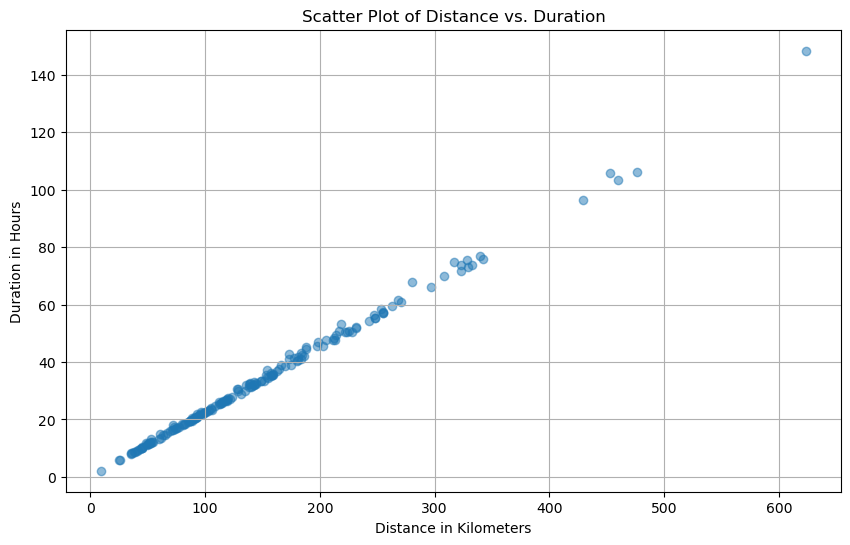

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(arc_df['Distance_km'], arc_df['Duration_hr'], alpha=0.5)
plt.title('Scatter Plot of Distance vs. Duration')
plt.xlabel('Distance in Kilometers')
plt.ylabel('Duration in Hours')
plt.grid(True)
plt.show()

### ultima comprobacion de rutas

In [69]:
# q
# Extract unique IDs from both From_Node and To_Node
unique_nodes = pd.concat([arc_df['From_Node'], arc_df['To_Node']]).unique()


In [73]:
def contains_node_id(secuencia):
    # Split the sequence into individual node IDs
    node_ids = secuencia.split(", ")
    # Check each node ID in the sequence to see if it's in the list of unique nodes
    # Returns True if any node ID is found in the unique_nodes, otherwise False
    return any(node_id in unique_nodes for node_id in node_ids)

# Apply the function to the 'secuencias' column
combined_rutas['contains_unique_node'] = combined_rutas['secuencias'].apply(contains_node_id)


In [74]:
# Print rows where the sequence does not contain any unique node IDs
print(combined_rutas[combined_rutas['contains_unique_node'] == False])


Empty DataFrame
Columns: [Unnamed: 0, secuencias, ID_Ruta, Non_Unique_IDs, Filtered_Secuencias, Total_IDs, Count_Non_Unique_IDs, Count_Filtered_IDs, Last_Five_IDs, Arc_Sequences, contains_unique_node]
Index: []


In [78]:
# Creating a sub DataFrame with specified columns
sub_df_no_dup = combined_rutas[['ID_Ruta', 'Filtered_Secuencias', 'Last_Five_IDs', 'Arc_Sequences']]


In [83]:
# Function to calculate total distance and duration for each sequence of arcs
def calculate_totals(arc_sequence, arc_data):
    # Split the sequence into individual arcs
    arcs = arc_sequence.split(", ")
    total_distance = 0
    total_duration = 0
    
    # Sum the distances and durations for each arc
    for arc in arcs:
        # Filter arc_df for the current arc and sum the relevant data
        arc_info = arc_data[arc_data['Arc'] == arc]
        total_distance += arc_info['Distance_km'].sum()
        total_duration += arc_info['Duration_hr'].sum()
    
    return total_distance, total_duration

# Apply the function to each sequence in 'Arc_Sequences'
sub_df_no_dup[['Total_Distance_km', 'Total_Duration_hr']] = sub_df_no_dup['Arc_Sequences'].apply(
    lambda x: calculate_totals(x, arc_df)
).apply(pd.Series)  # Convert the tuple returned by the function into two separate DataFrame columns

# Print the updated DataFrame to verify the results
print(sub_df_no_dup[['ID_Ruta', 'Arc_Sequences', 'Total_Distance_km', 'Total_Duration_hr']])


     ID_Ruta                                      Arc_Sequences  \
0     RC0001  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...   
1     RC0002  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...   
2     RC0003  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...   
3     RC0004  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...   
4     RC0005  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...   
...      ...                                                ...   
1726  RP0596  PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...   
1727  RP0597  PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...   
1728  RP0598  PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...   
1729  RP0599  PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...   
1730  RP0600  PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...   

      Total_Distance_km  Total_Duration_hr  
0              3525.280         797.783611  
1              3412.839         771.977222  
2              3184.615         720.919444  
3              

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_90162/740089436.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_no_dup[['Total_Distance_km', 'Total_Duration_hr']] = sub_df_no_dup['Arc_Sequences'].apply(


In [102]:
sub_df_no_dup_filtered # necesito eliminar filas que tengan 'PG189-PG190' en cualquier parte se su secuencia en la columna ""

,ID_Ruta,Filtered_Secuencias,Last_Five_IDs,Arc_Sequences,Total_Distance_km,Total_Duration_hr,Contains_Zero_Value_Arc
0,RC0001,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","['PG841', 'PG921', 'PG769', 'PG655', 'PG578']","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",3525.280,797.783611,False
1,RC0002,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","['PG956', 'PG841', 'PG921', 'PG769', 'PG774']","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",3412.839,771.977222,False
2,RC0003,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","['PG956', 'PG841', 'PG921', 'PG769', 'PG887']","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",3184.615,720.919444,False
3,RC0004,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","['PG841', 'PG921', 'PG1040', 'PG1081', 'PG1082']","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",3131.842,708.520000,False
4,RC0005,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","['PG956', 'PG841', 'PG921', 'PG1040', 'PG1081']","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",3042.344,688.373611,False
...,...,...,...,...,...,...,...
1726,RP0596,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...","['PG497', 'PG499', 'PG460', 'PG422', 'PG268']","PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...",4985.416,1140.533889,False
1727,RP0597,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...","['PG497', 'PG499', 'PG460', 'PG422', 'PG307']","PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...",4916.119,1124.952500,False
1728,RP0598,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...","['PG534', 'PG497', 'PG499', 'PG460', 'PG422']","PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...",4688.350,1074.450556,False
1729,RP0599,"PG1531, PG1532, PG1493, PG1454, PG1415, PG1376...","['PG534', 'PG497', 'PG499', 'PG538', 'PG500']","PG1531-PG1532, PG1532-PG1493, PG1493-PG1454, P...",4548.230,1043.828333,False


In [100]:
# ID de la Ruta que deseas explorar
ruta_id = 'RP0010'  # Cambia este valor por el ID de ruta que deseas consultar

# Función para calcular el total de distancia y duración para cada arco
def calculate_arc_totals(arc, arc_data):
    arc_info = arc_data[arc_data['Arc'] == arc]
    total_distance = arc_info['Distance_km'].sum()
    total_duration = arc_info['Duration_hr'].sum()
    return total_distance, total_duration

# Filtra la fila para la ruta específica y obtiene la secuencia de arcos
ruta_especifica = sub_df_no_dup_filtered[sub_df_no_dup_filtered['ID_Ruta'] == ruta_id]
arcos = ruta_especifica['Arc_Sequences'].values[0].split(", ")

# Diccionario para almacenar los totales por cada arco
arc_totals = {}

# Calcula los totales para cada arco en la secuencia de la ruta
for arc in arcos:
    distance, duration = calculate_arc_totals(arc, arc_df)
    arc_totals[arc] = {'Distance_km': distance, 'Duration_hr': duration}

# Imprimir los resultados para cada arco
print(f"Totales para cada arco en la ruta {ruta_id}:")
for arc, totals in arc_totals.items():
    print(f"{arc}: Distance = {totals['Distance_km']} km, Duration = {totals['Duration_hr']} hr")



Totales para cada arco en la ruta RP0010:
PG1529-PG1530: Distance = 35.563 km, Duration = 8.132222222222222 hr
PG1530-PG1491: Distance = 102.685 km, Duration = 22.952222222222225 hr
PG1491-PG1492: Distance = 45.255 km, Duration = 10.1375 hr
PG1492-PG1453: Distance = 100.923 km, Duration = 22.60805555555556 hr
PG1453-PG1414: Distance = 36.437 km, Duration = 8.149444444444445 hr
PG1414-PG1415: Distance = 9.423 km, Duration = 2.1486111111111112 hr
PG1415-PG1376: Distance = 103.553 km, Duration = 23.126666666666665 hr
PG1376-PG1375: Distance = 52.561 km, Duration = 11.835 hr
PG1375-PG1297: Distance = 164.224 km, Duration = 37.61083333333333 hr
PG1297-PG1258: Distance = 95.144 km, Duration = 21.431944444444444 hr
PG1258-PG1219: Distance = 87.789 km, Duration = 19.97972222222222 hr
PG1219-PG1220: Distance = 50.55 km, Duration = 11.625555555555556 hr
PG1220-PG1221: Distance = 172.787 km, Duration = 42.85472222222222 hr
PG1221-PG1222: Distance = 97.645 km, Duration = 22.2125 hr
PG1222-PG1143: 

### eliminamos restos de rutas que aun tienen arcos desechados como:
PG534-PG189: Distance = 0.0 km, Duration = 0.0 hr

In [94]:
# Filtrar las filas que no contienen 'PG189-PG190' en la columna 'Arc_Sequences'
sub_df_no_dup_filtered = sub_df_no_dup[~sub_df_no_dup['Arc_Sequences'].str.contains('PG189-PG190')]

# Verificar las dimensiones del DataFrame después de la eliminación
print(sub_df_no_dup_filtered.shape)

# Mostrar las primeras filas del DataFrame filtrado para verificación
print(sub_df_no_dup_filtered.head())


(1673, 7)
  ID_Ruta                                Filtered_Secuencias  \
0  RC0001  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   
1  RC0002  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   
2  RC0003  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   
3  RC0004  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   
4  RC0005  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   

                                      Last_Five_IDs  \
0     ['PG841', 'PG921', 'PG769', 'PG655', 'PG578']   
1     ['PG956', 'PG841', 'PG921', 'PG769', 'PG774']   
2     ['PG956', 'PG841', 'PG921', 'PG769', 'PG887']   
3  ['PG841', 'PG921', 'PG1040', 'PG1081', 'PG1082']   
4   ['PG956', 'PG841', 'PG921', 'PG1040', 'PG1081']   

                                       Arc_Sequences  Total_Distance_km  \
0  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...           3525.280   
1  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...           3412.839   
2  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P

In [105]:
# Specify the path where you want to save the CSV file
output_path = "/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes_1.csv"

# Save the DataFrame to a CSV file at the specified path
sub_df_no_dup_filtered.to_csv(output_path, index=False)

  ID_Ruta                                Filtered_Secuencias  \
0  RC0001  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   
1  RC0002  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   
2  RC0003  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   
3  RC0004  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   
4  RC0005  PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...   

                                      Last_Five_IDs  \
0     ['PG841', 'PG921', 'PG769', 'PG655', 'PG578']   
1     ['PG956', 'PG841', 'PG921', 'PG769', 'PG774']   
2     ['PG956', 'PG841', 'PG921', 'PG769', 'PG887']   
3  ['PG841', 'PG921', 'PG1040', 'PG1081', 'PG1082']   
4   ['PG956', 'PG841', 'PG921', 'PG1040', 'PG1081']   

                                       Arc_Sequences  Total_Distance_km  \
0  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...           3525.280   
1  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...           3412.839   
2  PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...       

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_90162/2185752545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_no_dup_filtered['Route_Prefix'] = sub_df_no_dup_filtered['ID_Ruta'].apply(lambda x: x[:2])


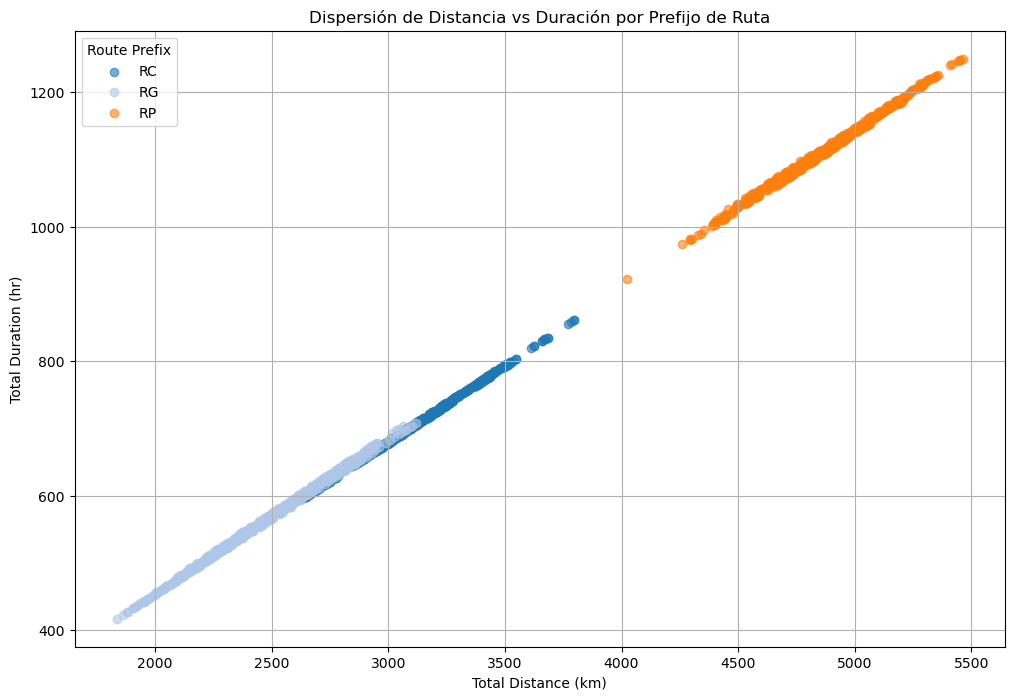

In [107]:
# Verificar que la columna ha sido eliminada
print(sub_df_no_dup_filtered.head())

# Extraer el prefijo de dos letras de cada ID_Ruta
sub_df_no_dup_filtered['Route_Prefix'] = sub_df_no_dup_filtered['ID_Ruta'].apply(lambda x: x[:2])

# Crear un mapeo de colores único para cada prefijo
unique_prefixes = sub_df_no_dup_filtered['Route_Prefix'].unique()
color_map = {prefix: plt.cm.tab20(i) for i, prefix in enumerate(unique_prefixes)}

# Graficar cada grupo con un color diferente
plt.figure(figsize=(12, 8))
for prefix in unique_prefixes:
    subset = sub_df_no_dup_filtered[sub_df_no_dup_filtered['Route_Prefix'] == prefix]
    plt.scatter(subset['Total_Distance_km'], subset['Total_Duration_hr'], 
                color=color_map[prefix], label=prefix, alpha=0.6)

plt.title('Dispersión de Distancia vs Duración por Prefijo de Ruta')
plt.xlabel('Total Distance (km)')
plt.ylabel('Total Duration (hr)')
plt.legend(title='Route Prefix')
plt.grid(True)
plt.show()


notas:

la distancia juega un papel impportante, y bien podria ser parte de cualquiera de las dos metricas de vulnerabilidad por capacidad institucional, dado la presencia de asistencia en el centroide sobre la distancia entre un punto y otro

la presencia de asistencia a lo largo del arco total

### continuamos:


## rutas polygonos arcos

Consulta a la API de Google Maps: Para cada par de puntos de origen y destino, realizar una consulta para obtener la ruta a pie, incluyendo la polilínea codificada, tiempo y distancia.


Decodificar y almacenar las polilíneas: Decodificar cada polilínea codificada obtenida y almacenarla en tu DataFrame.


Convertir a GeoDataFrame: Convertir el DataFrame actualizado en un GeoDataFrame.


Guardar y visualizar: Opcionalmente, guardar el GeoDataFrame y preparar todo para visualización en ArcGIS Pro.

In [113]:
import pandas as pd
import requests
import polyline
from shapely.geometry import LineString
import geopandas as gpd

In [131]:
import arcpy


ModuleNotFoundError: No module named 'arcpy'

In [114]:
# Configuración de API Key
api_key = 'xxx'

In [132]:
df_filtrado

,Arc,From_Node,To_Node,ciudad_origen,ciudad_destino,origen_xy,destino_xy,eventos_arco,Distance_km,Duration_hr,distance,duration,geometry
0,PG1414-PG1415,PG1414,PG1415,"Chahuites, Oaxaca","San Pedro Tapanatepec, Oaxaca","16.2885299, -94.1942777","16.3689223, -94.1927528",337,9.423,2.148611,9.4 km,2 hours 9 mins,"LINESTRING (16.28808 -94.19441, 16.28853 -94.1..."
1,PG913-PG914,PG913,PG914,"Tlajomulco de Zuniga, Jalisco","Guadalajara, Jalisco","20.48187375, -103.400509663829","20.6720375, -103.338396",1435,25.039,5.739722,25.0 km,5 hours 44 mins,"LINESTRING (20.48187 -103.40049, 20.48203 -103..."
2,PG953-PG914,PG953,PG914,"El Salto, Jalisco","Guadalajara, Jalisco","20.5196964, -103.1813141","20.6720375, -103.338396",1333,25.752,5.903333,25.8 km,5 hours 54 mins,"LINESTRING (20.51975 -103.18114, 20.52092 -103..."
3,PG1299-PG1260,PG1299,PG1260,"Oaxaca de Juarez, Oaxaca","San Francisco Telixtlahuaca, Oaxaca","17.0604663, -96.7253575","17.296628, -96.9056112",1319,35.370,8.161389,35.4 km,8 hours 10 mins,"LINESTRING (17.06043 -96.72541, 17.06049 -96.7..."
4,PG1529-PG1530,PG1529,PG1530,"Suchiate, Chiapas","Tapachula, Chiapas","14.6321744, -92.241963360953","14.9042905, -92.2609265",124475,35.563,8.132222,35.6 km,8 hours 8 mins,"LINESTRING (14.63441 -92.23982, 14.63557 -92.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,PG769-PG655,PG769,PG655,"Chihuahua, Chihuahua","Janos, Chihuahua","28.5000001, -106.0000001","30.8893267, -108.1930484",2164,429.115,96.400833,429 km,4 days 0 hours,"LINESTRING (28.4985 -106.00039, 28.49782 -105...."
175,PG1260-PG1143,PG1260,PG1143,"San Francisco Telixtlahuaca, Oaxaca","Chilpancingo de los Bravo, Guerrero","17.296628, -96.9056112","17.5542149, -99.5048416",79,453.124,105.852778,453 km,4 days 10 hours,"LINESTRING (17.29663 -96.90549, 17.29157 -96.9..."
176,PG921-PG769,PG921,PG769,"Gomez Palacio, Durango","Chihuahua, Chihuahua","25.5732473, -103.494779","28.5000001, -106.0000001",3083,459.896,103.228889,460 km,4 days 7 hours,"LINESTRING (25.57285 -103.49453, 25.57259 -103..."
177,PG769-PG774,PG769,PG774,"Chihuahua, Chihuahua","Juarez, Chihuahua","28.5000001, -106.0000001","31.7372575, -106.485655",9960,476.018,106.256389,476 km,4 days 10 hours,"LINESTRING (28.4985 -106.00039, 28.49782 -105...."


In [ ]:
def shapely_to_arcpy(geometry, spatial_reference):
    if isinstance(geometry, LineString):
        return arcpy.Polyline(arcpy.Array([arcpy.Point(*coords) for coords in geometry.coords]), spatial_reference)
    return None

# Asumiendo que el Spatial Reference de tu proyección es WGS 84 (EPSG:4326)
spatial_reference = arcpy.SpatialReference(4326)

# Aplicar la conversión a cada geometría en el GeoDataFrame
df_filtrado['geometry'] = df_filtrado['geometry'].apply(lambda x: shapely_to_arcpy(x, spatial_reference))


In [116]:
def obtener_ruta_y_polilinea(row, api_key):
    base_url = "https://maps.googleapis.com/maps/api/directions/json"
    params = {
        'origin': row['origen_xy'],
        'destination': row['destino_xy'],
        'mode': 'walking',  # Modo a pie
        'key': api_key
    }
    response = requests.get(base_url, params=params)
    result = response.json()

    if result['status'] == 'OK':
        polyline_encoded = result['routes'][0]['overview_polyline']['points']
        distancia = result['routes'][0]['legs'][0]['distance']['text']
        duracion = result['routes'][0]['legs'][0]['duration']['text']
        puntos = polyline.decode(polyline_encoded)
        geometry = LineString(puntos)
        return geometry, distancia, duracion
    else:
        return None, None, None

# Aplicar a cada fila del DataFrame
df[['geometry', 'distance', 'duration']] = df.apply(lambda row: obtener_ruta_y_polilinea(row, api_key), axis=1, result_type='expand')


In [123]:
df_filtrado = gpd.GeoDataFrame(gdf, geometry='geometry', crs="EPSG:4326")


In [124]:
df_filtrado.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.geojson", driver='GeoJSON')


In [128]:
# Guardar como Shapefile
gdf.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.shp", driver='GeoJSON')

# O guardar como Feature Class en un Geodatabase
output_path = "C:/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.gdb"  # Modifica con la ruta a tu geodatabase
output_fc = "output_feature_class"
arcpy.conversion.FeatureClassToFeatureClass("output_shapefile.shp", output_path, output_fc)


NameError: name 'arcpy' is not defined

In [125]:
# Lista de columnas que deseas conservar
columnas_deseadas = [
    'Arc', 'From_Node', 'To_Node', 'ciudad_origen','ciudad_destino', 'origen_xy', 'destino_xy', 'eventos_arco', 'Distance_km', 
    'Duration_hr', 'distance', 'duration', 'geometry'
]

# Filtrar el DataFrame para conservar solo las columnas deseadas
df_filtrado = df[columnas_deseadas]

# Si quieres verificar las columnas del nuevo DataFrame
print(df_filtrado.columns)


Index(['Arc', 'From_Node', 'To_Node', 'ciudad_origen', 'ciudad_destino',
       'origen_xy', 'destino_xy', 'eventos_arco', 'Distance_km', 'Duration_hr',
       'distance', 'duration', 'geometry'],
      dtype='object')



## segmentacion y asignacion de valores a polyline

In [126]:
# Si quieres ver las primeras filas del DataFrame filtrado para verifica
df_filtrado.head()

,Arc,From_Node,To_Node,ciudad_origen,ciudad_destino,origen_xy,destino_xy,eventos_arco,Distance_km,Duration_hr,distance,duration,geometry
0,PG1414-PG1415,PG1414,PG1415,"Chahuites, Oaxaca","San Pedro Tapanatepec, Oaxaca","16.2885299, -94.1942777","16.3689223, -94.1927528",337,9.423,2.148611,9.4 km,2 hours 9 mins,"LINESTRING (16.28808 -94.19441, 16.28853 -94.1..."
1,PG913-PG914,PG913,PG914,"Tlajomulco de Zuniga, Jalisco","Guadalajara, Jalisco","20.48187375, -103.400509663829","20.6720375, -103.338396",1435,25.039,5.739722,25.0 km,5 hours 44 mins,"LINESTRING (20.48187 -103.40049, 20.48203 -103..."
2,PG953-PG914,PG953,PG914,"El Salto, Jalisco","Guadalajara, Jalisco","20.5196964, -103.1813141","20.6720375, -103.338396",1333,25.752,5.903333,25.8 km,5 hours 54 mins,"LINESTRING (20.51975 -103.18114, 20.52092 -103..."
3,PG1299-PG1260,PG1299,PG1260,"Oaxaca de Juarez, Oaxaca","San Francisco Telixtlahuaca, Oaxaca","17.0604663, -96.7253575","17.296628, -96.9056112",1319,35.370,8.161389,35.4 km,8 hours 10 mins,"LINESTRING (17.06043 -96.72541, 17.06049 -96.7..."
4,PG1529-PG1530,PG1529,PG1530,"Suchiate, Chiapas","Tapachula, Chiapas","14.6321744, -92.241963360953","14.9042905, -92.2609265",124475,35.563,8.132222,35.6 km,8 hours 8 mins,"LINESTRING (14.63441 -92.23982, 14.63557 -92.2..."
